# Prediksi Keselamatan Penumpang Titanic Menggunakan Logistic Regression

## Anggota Kelompok

* Hafizh Marfiansyah Putra - 103012300201
* Azzahra Indah - 103012300238


## Pendahuluan dan Paparan Data

Tragedi tenggelamnya kapal **RMS Titanic** pada tahun 1912 merupakan salah satu peristiwa paling terkenal dalam sejarah pelayaran. Dari kejadian tersebut, tidak semua penumpang memiliki peluang yang sama untuk selamat. Faktor seperti kelas penumpang, jenis kelamin, usia, serta kondisi keluarga diduga memengaruhi tingkat keselamatan penumpang.

Pada tugas besar ini, kami membangun sebuah **model Artificial Intelligence menggunakan algoritma Logistic Regression** untuk memprediksi apakah seorang penumpang Titanic **selamat (Survived)** atau **tidak selamat**, berdasarkan beberapa atribut penumpang yang tersedia dalam dataset.

## Dataset dan Sumber Data

Dataset yang digunakan adalah **Titanic Dataset**, yang berisi data penumpang kapal Titanic beserta status keselamatannya. Dataset ini banyak digunakan sebagai studi kasus dalam machine learning karena memiliki struktur data yang jelas dan relevan untuk klasifikasi biner.

Variabel yang digunakan dalam penelitian ini adalah:

* **Survived**: Status keselamatan penumpang (target)
* **Pclass**: Kelas penumpang
* **Sex**: Jenis kelamin
* **Age**: Usia penumpang
* **SibSp**: Jumlah saudara atau pasangan di kapal
* **Parch**: Jumlah orang tua atau anak di kapal
* **Fare**: Harga tiket
* **Embarked**: Pelabuhan keberangkatan

## Pre-processing Dataset

Sebelum membangun model, dataset melalui beberapa tahapan pre-processing, antara lain:

* Pemilihan fitur yang relevan sesuai variabel yang digunakan
* Penanganan data kategorikal seperti **Sex** dan **Embarked**
* Penanganan data kosong atau tidak valid
* Penyesuaian format data agar dapat diproses oleh model Logistic Regression

Tahapan ini bertujuan untuk meningkatkan kualitas data dan performa model yang dibangun.

## Pembagian Data Training, Validasi, dan Testing

Dataset dibagi menjadi tiga bagian untuk memastikan model dapat dilatih dan dievaluasi dengan baik:

* **60% data** digunakan sebagai **training set** untuk melatih model
* **20% data** digunakan sebagai **validation set** untuk mengevaluasi dan menyetel model
* **20% data** digunakan sebagai **testing set** untuk mengukur performa akhir model

Pembagian data dilakukan secara acak dengan menggunakan seed tertentu agar hasil eksperimen dapat direproduksi.


In [ ]:
import pandas as pd
import random

# ===============================
# 1. LOAD DATA
# ===============================
df = pd.read_csv('Titanic-Dataset.csv')

# ===============================
# 2. BASIC CLEANING
# ===============================
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Fare'] = df['Fare'].fillna(df['Fare'].median())
df['Embarked'] = df['Embarked'].fillna('S')

# ===============================
# 3. ENCODE CATEGORICAL FEATURES
# ===============================


df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode Embarked
df['Embarked_S'] = (df['Embarked'] == 'S').astype(int)
df['Embarked_C'] = (df['Embarked'] == 'C').astype(int)
df['Embarked_Q'] = (df['Embarked'] == 'Q').astype(int)

# ===============================
# 4. FEATURES & TARGET
# ===============================
feature_names = [
    'Pclass',
    'Sex',
    'Age',
    'SibSp',
    'Parch',
    'Fare',
    'Embarked_S',
    'Embarked_C',
    'Embarked_Q'
]

X = df[feature_names].values.tolist()
y = df['Survived'].values.tolist()

n_features = len(feature_names)

print(f"Features used ({n_features}): {feature_names}")

# ===============================
# 5. TRAIN / VAL / TEST SPLIT (60 / 20 / 20)
# ===============================
random.seed(69)

indices = list(range(len(X)))
random.shuffle(indices)

n_total = len(indices)
train_end = int(0.6 * n_total)
val_end   = int(0.8 * n_total)

train_idx = indices[:train_end]
val_idx   = indices[train_end:val_end]
test_idx  = indices[val_end:]

X_train = [X[i] for i in train_idx]
y_train = [y[i] for i in train_idx]

X_val = [X[i] for i in val_idx]
y_val = [y[i] for i in val_idx]

X_test = [X[i] for i in test_idx]
y_test = [y[i] for i in test_idx]

print("\nDataset split:")
print(f"Training   : {len(X_train)}")
print(f"Validation : {len(X_val)}")
print(f"Testing    : {len(X_test)}")


Features used (9): ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Embarked_Q']

Dataset split:
Training   : 534
Validation : 178
Testing    : 179


In [ ]:
# ===============================
# HELPER FUNCTIONS
# ===============================

def find_mean(dataset):
    return sum(dataset) / len(dataset)

def find_standard_deviation(dataset, mean):
    return (sum((x - mean) ** 2 for x in dataset) / len(dataset)) ** 0.5


# ===============================
# COMPUTE MEANS & STDS (TRAIN ONLY)
# ===============================

feature_means = []
feature_stds = []

for feature_idx in range(n_features):
    column_values = [row[feature_idx] for row in X_train]
    print("Column values:", column_values)
    mean = find_mean(column_values)
    std = find_standard_deviation(column_values, mean)

    if std == 0:
        std = 1.0

    feature_means.append(mean)
    feature_stds.append(std)

print("Means:", feature_means)
print("Stds :", feature_stds)

# ===============================
# 2. APPLY NORMALIZATION FUNCTION
# ===============================
def scale_dataset(data, means, stds):
    scaled_data = []
    for row in data:
        new_row = [(row[i] - means[i]) / stds[i] for i in range(len(row))]
        scaled_data.append(new_row)
    return scaled_data

# Normalize all splits
X_train = scale_dataset(X_train, feature_means, feature_stds)
X_val  = scale_dataset(X_val, feature_means, feature_stds)
X_test  = scale_dataset(X_test, feature_means, feature_stds)

print("Normalization complete.")
print(f"Example original row: {X_train[0]}")
print(f"Example scaled row:   {[round(x, 4) for x in X_train[0]]}")

Column values: [2.0, 3.0, 1.0, 2.0, 3.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 2.0, 1.0, 1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0,

## Metode dan Eksperimen

### Metode yang Digunakan

Pada penelitian ini, metode yang digunakan adalah **Logistic Regression**, yaitu salah satu algoritma klasifikasi biner yang memodelkan hubungan antara variabel input dan probabilitas suatu kelas. Logistic Regression digunakan untuk menghitung **probabilitas seorang penumpang Titanic selamat atau tidak selamat**, dengan memanfaatkan fungsi sigmoid sebagai fungsi aktivasi.

Model dibangun dari awal tanpa menggunakan library machine learning eksternal. Proses pelatihan dilakukan menggunakan **gradient descent** dengan regularisasi L2 (ridge) untuk mengurangi risiko overfitting. Parameter model yang dipelajari meliputi bobot (weight) untuk setiap fitur dan sebuah bias.

Fungsi sigmoid digunakan untuk mengubah hasil perhitungan linear menjadi nilai probabilitas antara 0 dan 1. Nilai probabilitas tersebut kemudian dikonversi menjadi kelas prediksi dengan threshold 0.5.

### Pengukuran Kinerja Model

Kinerja model dievaluasi menggunakan **metrik akurasi (accuracy)**. Akurasi mengukur seberapa besar proporsi prediksi yang benar dibandingkan dengan keseluruhan data.

Evaluasi dilakukan pada tiga subset data:

* **Training set** untuk melatih model
* **Validation set** untuk memilih hyperparameter terbaik
* **Testing set** untuk mengukur performa akhir model

Penggunaan data validasi bertujuan agar proses pemilihan hyperparameter tidak bias terhadap data uji, sehingga hasil evaluasi lebih objektif.

### Hyperparameter dan Hyperparameter Tuning

Beberapa hyperparameter utama yang digunakan dalam model Logistic Regression adalah:

* **Learning rate**, yang mengatur besar langkah pembaruan parameter
* **Lambda**, sebagai parameter regularisasi untuk mengontrol kompleksitas model
* **Jumlah epoch**, yang menentukan berapa kali proses pelatihan dilakukan terhadap seluruh data training

Untuk memperoleh kombinasi hyperparameter yang optimal, digunakan metode **Genetic Algorithm**. Genetic Algorithm bekerja dengan meniru proses evolusi biologis, yaitu melalui tahapan inisialisasi populasi, evaluasi fitness, seleksi, crossover, dan mutasi.

Setiap individu dalam populasi merepresentasikan satu kombinasi hyperparameter. Nilai **fitness** ditentukan berdasarkan akurasi model pada data validasi. Individu dengan performa terbaik akan dipertahankan dan dikombinasikan untuk menghasilkan generasi berikutnya.

Proses ini dijalankan selama beberapa generasi hingga diperoleh kombinasi hyperparameter dengan performa validasi terbaik. Hyperparameter hasil Genetic Algorithm kemudian digunakan untuk melatih model akhir sebelum dilakukan pengujian pada data testing.

In [56]:
import math
import random

# ===============================
# HYPERPARAMETERS
# ===============================
learning_rate = 0.024104914547185125
lambda_ = 0.008886564986697631
epochs = 3165

# ===============================
# DATA SIZES
# ===============================
n_samples = len(X_train)
n_features = len(X_train[0])

# ===============================
# INITIALIZE PARAMETERS
# ===============================
weight = [random.uniform(-0.01, 0.01) for _ in range(n_features)]
b = 0.0


# ===============================
# MODEL FUNCTIONS
# ===============================
def sigmoid(z):
    if z >= 0:
        return 1 / (1 + math.exp(-z))
    else:
        ez = math.exp(z)
        return ez / (1 + ez)


def find_weighted_sum_for_row(row):
    return sum(weight[i] * row[i] for i in range(n_features)) + b


# ===============================
# TRAINING
# ===============================
def train_logistic_regression(X_train, y_train, lr, lambda_, epochs):
    n_samples = len(X_train)
    n_features = len(X_train[0])

    # initialize parameters
    weight = [random.uniform(-0.01, 0.01) for _ in range(n_features)]
    b = 0.0

    for _ in range(epochs):
        preds = [
            sigmoid(sum(weight[i] * X_train[j][i] for i in range(n_features)) + b)
            for j in range(n_samples)
        ]

        # update weights
        for i in range(n_features):
            grad = sum((preds[j] - y_train[j]) * X_train[j][i] for j in range(n_samples)) / n_samples
            grad += lambda_ * weight[i]
            weight[i] -= lr * grad

        # update bias
        b_grad = sum(preds[j] - y_train[j] for j in range(n_samples)) / n_samples
        b -= lr * b_grad

    return weight, b


def train_model(epochs):
    global weight, b
    weight, b = train_logistic_regression(X_train, y_train, learning_rate, lambda_, epochs)
    print(f"Training completed.")

def accuracy(X, y, weight, b):
    correct = 0
    for i in range(len(X)):
        z = sum(weight[j] * X[i][j] for j in range(len(weight))) + b
        pred = 1 if sigmoid(z) >= 0.5 else 0
        if pred == y[i]:
            correct += 1
    return correct / len(X)


# ===============================
# TRAIN
# ===============================
train_model(epochs)

print("\nTrained weights:", weight)
print("Trained bias:", b)


# ===============================
# TEST ON TEST SET
# ===============================
print("\nTest predictions (first 5):")
for i in range(5):
    p = sigmoid(find_weighted_sum_for_row(X_test[i]))
    print(f"Sample {i}: probability={p:.4f}, predicted={1 if p>=0.5 else 0}, actual={y_test[i]}")


Training completed.

Trained weights: [-0.8528401580640919, 1.1428016530664011, -0.4937577853735852, -0.3230164454406365, -0.1235248331159867, 0.11377776499587265, -0.07583701729349236, 0.03945911121778763, 0.06819040238943]
Trained bias: -0.552810349840814

Test predictions (first 5):
Sample 0: probability=0.1117, predicted=0, actual=0
Sample 1: probability=0.5878, predicted=1, actual=0
Sample 2: probability=0.0406, predicted=0, actual=0
Sample 3: probability=0.0612, predicted=0, actual=0
Sample 4: probability=0.8505, predicted=1, actual=1


In [57]:
# ===============================
# GENETIC ALGORITHM
# ===============================

POP_SIZE = 8
GENERATIONS = 10
MUTATION_RATE = 0.2


def random_individual():
    return {
        "lr": random.uniform(0.001, 0.05),
        "lambda": random.uniform(0.00001, 0.01),
        "epochs": random.randint(3000, 15000)
    }


def fitness(individual):
    weight, b = train_logistic_regression(X_train, y_train,individual["lr"],individual["lambda"],individual["epochs"]
    )
    return accuracy(X_val, y_val, weight, b)


# initialize population
population = [random_individual() for _ in range(POP_SIZE)]

best_individual = None
best_score = 0

for gen in range(GENERATIONS):
    print(f"\nGeneration {gen}")

    scored = []
    for ind in population:
        score = fitness(ind)
        scored.append((score, ind))
        print(f"  {ind} → val acc = {score:.4f}")

    scored.sort(reverse=True, key=lambda x: x[0])

    if scored[0][0] > best_score:
        best_score = scored[0][0]
        best_individual = scored[0][1]

    # selection (top 50%)
    survivors = [ind for _, ind in scored[:POP_SIZE // 2]]

    # crossover + mutation
    new_population = survivors.copy()

    while len(new_population) < POP_SIZE:
        parent1 = random.choice(survivors)
        parent2 = random.choice(survivors)

        child = {
            "lr": random.choice([parent1["lr"], parent2["lr"]]),
            "lambda": random.choice([parent1["lambda"], parent2["lambda"]]),
            "epochs": random.choice([parent1["epochs"], parent2["epochs"]]),
        }

        # mutation
        if random.random() < MUTATION_RATE:
            child["lr"] *= random.uniform(0.8, 1.2)
        if random.random() < MUTATION_RATE:
            child["lambda"] *= random.uniform(0.8, 1.2)

        new_population.append(child)

    population = new_population


print("\nBEST HYPERPARAMETERS FOUND:")
print(best_individual)
print("Validation accuracy:", best_score)




Generation 0
  {'lr': 0.04810539848261843, 'lambda': 0.003286222431548926, 'epochs': 3309} → val acc = 0.7921
  {'lr': 0.032232380240248604, 'lambda': 0.0061882078006781265, 'epochs': 14614} → val acc = 0.7921
  {'lr': 0.010137759234555732, 'lambda': 0.007422706132235075, 'epochs': 7295} → val acc = 0.7921
  {'lr': 0.010303356655745655, 'lambda': 0.007414217377458676, 'epochs': 5124} → val acc = 0.7921
  {'lr': 0.0020532744885462043, 'lambda': 0.003233877101535049, 'epochs': 11415} → val acc = 0.7978
  {'lr': 0.04140076715116696, 'lambda': 0.007985619433582818, 'epochs': 6526} → val acc = 0.7921
  {'lr': 0.015319565964190724, 'lambda': 0.001321524003805649, 'epochs': 11979} → val acc = 0.7921
  {'lr': 0.04232140743824378, 'lambda': 0.00782935910497672, 'epochs': 8028} → val acc = 0.7921

Generation 1
  {'lr': 0.0020532744885462043, 'lambda': 0.003233877101535049, 'epochs': 11415} → val acc = 0.7978
  {'lr': 0.04810539848261843, 'lambda': 0.003286222431548926, 'epochs': 3309} → val acc


MODEL EVALUATION — TITANIC TEST SET

Metrics:
  Accuracy : 0.8101 (81.01%)
  Precision: 0.7500
  Recall   : 0.6774
  F1-score : 0.7119

Confusion Matrix:
                 Predicted
               |  Died | Survived
Actual Died    |  103  | 14
Actual Survived|  20   | 42

Probability Statistics:
  Min : 0.0100
  Max : 0.9612
  Mean: 0.3520


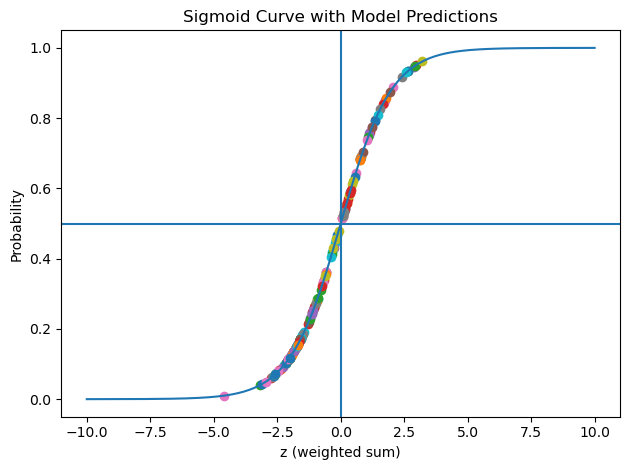

In [ ]:
# ===============================
# MODEL EVALUATION (FROM SCRATCH)
# ===============================
import matplotlib.pyplot as plt
def predict_proba(X):
    """Return probability predictions for input X"""
    return [
        sigmoid(sum(weight[i] * row[i] for i in range(n_features)) + b)
        for row in X
    ]


def predict(X, threshold=0.5):
    return [1 if p >= threshold else 0 for p in predict_proba(X)]


def evaluate_model(y_true, y_pred, y_proba=None, set_name="Dataset"):


    n = len(y_true)

    # ---- Metrics helpers ----
    def accuracy():
        return sum(1 for i in range(n) if y_true[i] == y_pred[i]) / n

    def precision():
        tp = sum(1 for i in range(n) if y_true[i] == 1 and y_pred[i] == 1)
        fp = sum(1 for i in range(n) if y_true[i] == 0 and y_pred[i] == 1)
        return tp / (tp + fp) if (tp + fp) > 0 else 0

    def recall():
        tp = sum(1 for i in range(n) if y_true[i] == 1 and y_pred[i] == 1)
        fn = sum(1 for i in range(n) if y_true[i] == 1 and y_pred[i] == 0)
        return tp / (tp + fn) if (tp + fn) > 0 else 0

    def f1():
        p = precision()
        r = recall()
        return 2 * p * r / (p + r) if (p + r) > 0 else 0

    def confusion_matrix():
        tp = sum(1 for i in range(n) if y_true[i] == 1 and y_pred[i] == 1)
        tn = sum(1 for i in range(n) if y_true[i] == 0 and y_pred[i] == 0)
        fp = sum(1 for i in range(n) if y_true[i] == 0 and y_pred[i] == 1)
        fn = sum(1 for i in range(n) if y_true[i] == 1 and y_pred[i] == 0)
        return tp, tn, fp, fn

    # ---- Compute ----
    acc = accuracy()
    prec = precision()
    rec = recall()
    f1s = f1()
    tp, tn, fp, fn = confusion_matrix()

    # ---- Display ----
    print("\n" + "=" * 60)
    print(f"MODEL EVALUATION — {set_name.upper()}")
    print("=" * 60)

    print("\nMetrics:")
    print(f"  Accuracy : {acc:.4f} ({acc*100:.2f}%)")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1s:.4f}")

    print("\nConfusion Matrix:")
    print("                 Predicted")
    print("               |  Died | Survived")
    print(f"Actual Died    |  {tn:<4} | {fp}")
    print(f"Actual Survived|  {fn:<4} | {tp}")

    if y_proba is not None:
        print("\nProbability Statistics:")
        print(f"  Min : {min(y_proba):.4f}")
        print(f"  Max : {max(y_proba):.4f}")
        print(f"  Mean: {sum(y_proba)/len(y_proba):.4f}")

    print("=" * 60)

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1s,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

y_proba = predict_proba(X_test)
y_pred = predict(X_test, threshold=0.5)

results = evaluate_model(
    y_true=y_test,
    y_pred=y_pred,
    y_proba=y_proba,
    set_name="Titanic Test Set"
)

def plot_sigmoid_with_model_outputs(X, y):
    z_vals = [
        sum(weight[j] * X[i][j] for j in range(len(weight))) + b
        for i in range(len(X))
    ]
    probs = [sigmoid(z) for z in z_vals]

    # Base sigmoid curve
    z_curve = [i / 10 for i in range(-100, 101)]
    s_curve = [sigmoid(z) for z in z_curve]

    plt.figure()
    plt.plot(z_curve, s_curve)

    # Overlay points
    for i in range(len(y)):
        if y[i] == 1:
            plt.scatter(z_vals[i], probs[i])
        else:
            plt.scatter(z_vals[i], probs[i])

    plt.axhline(0.5)
    plt.axvline(0.0)

    plt.xlabel("z (weighted sum)")
    plt.ylabel("Probability")
    plt.title("Sigmoid Curve with Model Predictions")
    plt.tight_layout()
    plt.show()


plot_sigmoid_with_model_outputs(X_test, y_test)

